# Description 📙

**Context**

`- This dataset contains an airline passenger satisfaction survey. What factors are highly correlated to a satisfied (or dissatisfied) passenger? Can you predict passenger satisfaction?`

**Content**
```
Gender: Gender of the passengers (Female, Male)

Customer Type: The customer type (Loyal customer, disloyal customer)

Age: The actual age of the passengers

Type of Travel: Purpose of the flight of the passengers (Personal Travel, Business Travel)

Class: Travel class in the plane of the passengers (Business, Eco, Eco Plus)

Flight distance: The flight distance of this journey

Inflight wifi service: Satisfaction level of the inflight wifi service (0:Not Applicable;1-5)

Departure/Arrival time convenient: Satisfaction level of Departure/Arrival time convenient

Ease of Online booking: Satisfaction level of online booking

Gate location: Satisfaction level of Gate location

Food and drink: Satisfaction level of Food and drink

Online boarding: Satisfaction level of online boarding

Seat comfort: Satisfaction level of Seat comfort

Inflight entertainment: Satisfaction level of inflight entertainment

On-board service: Satisfaction level of On-board service

Leg room service: Satisfaction level of Leg room service

Baggage handling: Satisfaction level of baggage handling

Check-in service: Satisfaction level of Check-in service

Inflight service: Satisfaction level of inflight service

Cleanliness: Satisfaction level of Cleanliness

Departure Delay in Minutes: Minutes delayed when departure

Arrival Delay in Minutes: Minutes delayed when Arrival

Satisfaction: Airline satisfaction level(Satisfaction, neutral or dissatisfaction)
```

# Libraries 📧

In [ ]:
!pip install pandas-profiling

In [3]:
!pip install markupsafe==2.0.1

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from pandas_profiling import ProfileReport

# Data | Kaggle | Google 📅

In [5]:
# Kaggle setup

from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"ryotaro94","key":"0cb2246cac05cefd0072434ede20af36"}'}

In [6]:
# Kaggle setup

!pip install -q kaggle
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!mkdir project

In [ ]:
# Dataset download

!kaggle datasets list -s Airline

In [7]:
!kaggle datasets download teejmahal20/airline-passenger-satisfaction  
!unzip /content/airline-passenger-satisfaction.zip -d /content/project   
!rm /content/airline-passenger-satisfaction.zip

  0% 0.00/2.71M [00:00<?, ?B/s]
100% 2.71M/2.71M [00:00<00:00, 43.5MB/s]
Archive:  /content/airline-passenger-satisfaction.zip
  inflating: /content/project/test.csv  
  inflating: /content/project/train.csv  


# Exploratory Data Analysis (EDA) 📈

In [5]:
df_train = pd.read_csv("/content/project/train.csv")
df_test = pd.read_csv("/content/project/test.csv")
df_train_copy = df_train
df_test_copy = df_test

In [7]:
print(f"df_train: {df_train.shape[0]} rows and {df_train.shape[1]} columns")
print(f"df_test: {df_test.shape[0]} rows and {df_test.shape[1]} columns")

df_train: 103904 rows and 25 columns
df_test: 25976 rows and 25 columns


In [8]:
print("Train dataset")
df_train.describe().T

Train dataset


,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,103904.0,51951.500000,29994.645522,0.0,25975.75,51951.5,77927.25,103903.0
id,103904.0,64924.210502,37463.812252,1.0,32533.75,64856.5,97368.25,129880.0
Age,103904.0,39.379706,15.114964,7.0,27.00,40.0,51.00,85.0
Flight Distance,103904.0,1189.448375,997.147281,31.0,414.00,843.0,1743.00,4983.0
Inflight wifi service,103904.0,2.729683,1.327829,0.0,2.00,3.0,4.00,5.0
Departure/Arrival time convenient,103904.0,3.060296,1.525075,0.0,2.00,3.0,4.00,5.0
Ease of Online booking,103904.0,2.756901,1.398929,0.0,2.00,3.0,4.00,5.0
Gate location,103904.0,2.976883,1.277621,0.0,2.00,3.0,4.00,5.0
Food and drink,103904.0,3.202129,1.329533,0.0,2.00,3.0,4.00,5.0
Online boarding,103904.0,3.250375,1.349509,0.0,2.00,3.0,4.00,5.0


In [9]:
print("Test dataset")
df_test.describe().T

Test dataset


,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,25976.0,12987.500000,7498.769632,0.0,6493.75,12987.5,19481.25,25975.0
id,25976.0,65005.657992,37611.526647,17.0,32170.50,65319.5,97584.25,129877.0
Age,25976.0,39.620958,15.135685,7.0,27.00,40.0,51.00,85.0
Flight Distance,25976.0,1193.788459,998.683999,31.0,414.00,849.0,1744.00,4983.0
Inflight wifi service,25976.0,2.724746,1.335384,0.0,2.00,3.0,4.00,5.0
Departure/Arrival time convenient,25976.0,3.046812,1.533371,0.0,2.00,3.0,4.00,5.0
Ease of Online booking,25976.0,2.756775,1.412951,0.0,2.00,3.0,4.00,5.0
Gate location,25976.0,2.977094,1.282133,1.0,2.00,3.0,4.00,5.0
Food and drink,25976.0,3.215353,1.331506,0.0,2.00,3.0,4.00,5.0
Online boarding,25976.0,3.261665,1.355536,0.0,2.00,4.0,4.00,5.0


In [10]:
df_train.isnull().sum()

Unnamed: 0                             0
id                                     0
Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             310
satisfaction    

In [11]:
df_test.isnull().sum()

Unnamed: 0                            0
id                                    0
Gender                                0
Customer Type                         0
Age                                   0
Type of Travel                        0
Class                                 0
Flight Distance                       0
Inflight wifi service                 0
Departure/Arrival time convenient     0
Ease of Online booking                0
Gate location                         0
Food and drink                        0
Online boarding                       0
Seat comfort                          0
Inflight entertainment                0
On-board service                      0
Leg room service                      0
Baggage handling                      0
Checkin service                       0
Inflight service                      0
Cleanliness                           0
Departure Delay in Minutes            0
Arrival Delay in Minutes             83
satisfaction                          0


In [12]:
df_train = df_train.dropna()
df_test = df_test.dropna()

In [13]:
df_train.columns

Index(['Unnamed: 0', 'id', 'Gender', 'Customer Type', 'Age', 'Type of Travel',
       'Class', 'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'satisfaction'],
      dtype='object')

In [14]:
df_test.columns

Index(['Unnamed: 0', 'id', 'Gender', 'Customer Type', 'Age', 'Type of Travel',
       'Class', 'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'satisfaction'],
      dtype='object')

In [15]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 103594 entries, 0 to 103903
Data columns (total 25 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Unnamed: 0                         103594 non-null  int64  
 1   id                                 103594 non-null  int64  
 2   Gender                             103594 non-null  object 
 3   Customer Type                      103594 non-null  object 
 4   Age                                103594 non-null  int64  
 5   Type of Travel                     103594 non-null  object 
 6   Class                              103594 non-null  object 
 7   Flight Distance                    103594 non-null  int64  
 8   Inflight wifi service              103594 non-null  int64  
 9   Departure/Arrival time convenient  103594 non-null  int64  
 10  Ease of Online booking             103594 non-null  int64  
 11  Gate location                      1035

In [16]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25893 entries, 0 to 25975
Data columns (total 25 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Unnamed: 0                         25893 non-null  int64  
 1   id                                 25893 non-null  int64  
 2   Gender                             25893 non-null  object 
 3   Customer Type                      25893 non-null  object 
 4   Age                                25893 non-null  int64  
 5   Type of Travel                     25893 non-null  object 
 6   Class                              25893 non-null  object 
 7   Flight Distance                    25893 non-null  int64  
 8   Inflight wifi service              25893 non-null  int64  
 9   Departure/Arrival time convenient  25893 non-null  int64  
 10  Ease of Online booking             25893 non-null  int64  
 11  Gate location                      25893 non-null  int

In [7]:
def object_encoder(dataset):
    le = LabelEncoder()
    df = dataset
    for column in df.columns:
      if df[f"{column}"].dtype == "O":
        df[f"{column}"] = le.fit_transform(df[f"{column}"])
      else:
        pass

In [8]:
# Convert object column to categorical [0, 1, 2 ...]

object_encoder(df_train)
object_encoder(df_test)

In [19]:
def correlation_matrix(dataset):
    df = dataset
    df = df.corr()
    plt.figure(figsize=(19,9))
    sns.heatmap(df, vmin=-1, vmax=1, annot=True, linewidths=.2, cmap="RdYlBu", fmt=".2f")

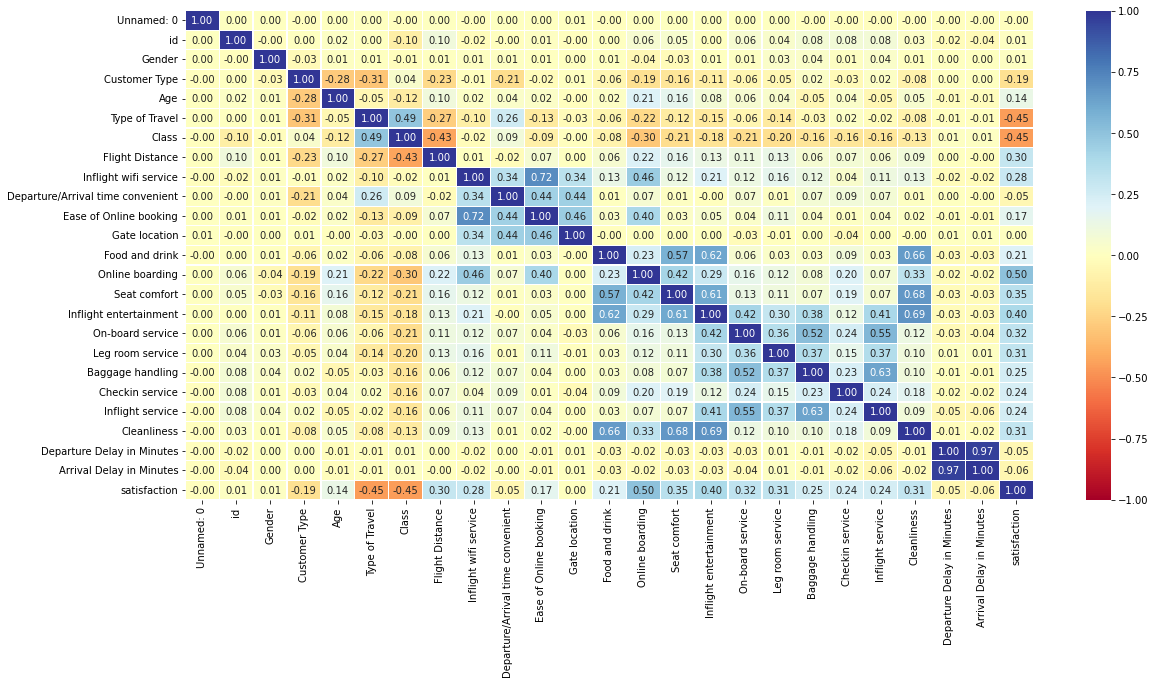

In [20]:
correlation_matrix(df_train)

In [23]:
df_train_copy

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103899,103899,94171,Female,disloyal Customer,23,Business travel,Eco,192,2,1,...,2,3,1,4,2,3,2,3,0.0,neutral or dissatisfied
103900,103900,73097,Male,Loyal Customer,49,Business travel,Business,2347,4,4,...,5,5,5,5,5,5,4,0,0.0,satisfied
103901,103901,68825,Male,disloyal Customer,30,Business travel,Business,1995,1,1,...,4,3,2,4,5,5,4,7,14.0,neutral or dissatisfied
103902,103902,54173,Female,disloyal Customer,22,Business travel,Eco,1000,1,1,...,1,4,5,1,5,4,1,0,0.0,neutral or dissatisfied


In [6]:
report = ProfileReport(df_train)

# Model

In [ ]:
# Auto ML.

!pip install auto-sklearn

In [13]:
!pip install scipy --upgrade

In [10]:
df_train = df_train.drop(["Unnamed: 0", "id"], axis=1)
df_test = df_test.drop(["Unnamed: 0", "id"], axis=1)

In [13]:
from sklearn.model_selection import train_test_split
import autosklearn.classification
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

In [14]:
X = df_train.drop("satisfaction", axis=1)
y= df_train['satisfaction']

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=69, test_size=.2)

In [16]:
automl = autosklearn.classification.AutoSklearnClassifier(
    time_left_for_this_task=120*3,
    per_run_time_limit=30*3
)

In [17]:
automl.fit(X_train, y_train, dataset_name="Airline Passenger Satisfaction")

AutoSklearnClassifier(per_run_time_limit=90, time_left_for_this_task=360)

In [18]:
y_pred = automl.predict(X_test)

In [19]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97     11765
           1       0.98      0.95      0.96      9016

    accuracy                           0.97     20781
   macro avg       0.97      0.96      0.97     20781
weighted avg       0.97      0.97      0.97     20781



In [28]:
print(automl.leaderboard())

          rank  ensemble_weight               type      cost   duration
model_id                                                               
4            1             0.54        extra_trees  0.036856  84.567462
7            2             0.28  gradient_boosting  0.038460  13.804723
2            3             0.14      random_forest  0.039335  54.184294
6            4             0.04                mlp  0.051256  28.719543


In [26]:
df_cv_results = pd.DataFrame(automl.cv_results_).sort_values(by = 'mean_test_score', ascending = False)
df_cv_results

,mean_test_score,mean_fit_time,params,rank_test_scores,status,budgets,param_balancing:strategy,param_classifier:__choice__,param_data_preprocessor:__choice__,param_feature_preprocessor:__choice__,...,param_data_preprocessor:feature_type:numerical_transformer:rescaling:robust_scaler:q_max,param_data_preprocessor:feature_type:numerical_transformer:rescaling:robust_scaler:q_min,param_feature_preprocessor:fast_ica:n_components,param_feature_preprocessor:kernel_pca:coef0,param_feature_preprocessor:kernel_pca:degree,param_feature_preprocessor:kernel_pca:gamma,param_feature_preprocessor:nystroem_sampler:coef0,param_feature_preprocessor:nystroem_sampler:degree,param_feature_preprocessor:nystroem_sampler:gamma,param_feature_preprocessor:select_rates_classification:mode
2,0.963144,84.567462,"{'balancing:strategy': 'weighting', 'classifie...",1,Success,0.0,weighting,extra_trees,feature_type,feature_agglomeration,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,0.961540,13.804723,"{'balancing:strategy': 'weighting', 'classifie...",2,Success,0.0,weighting,gradient_boosting,feature_type,no_preprocessing,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,0.960665,54.184294,"{'balancing:strategy': 'none', 'classifier:__c...",3,Success,0.0,none,random_forest,feature_type,no_preprocessing,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.948744,28.719543,"{'balancing:strategy': 'none', 'classifier:__c...",4,Success,0.0,none,mlp,feature_type,feature_agglomeration,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.853815,8.155385,"{'balancing:strategy': 'none', 'classifier:__c...",5,Success,0.0,none,sgd,feature_type,select_percentile_classification,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.000000,90.023280,"{'balancing:strategy': 'none', 'classifier:__c...",6,Timeout,0.0,none,mlp,feature_type,feature_agglomeration,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,0.000000,54.035176,"{'balancing:strategy': 'none', 'classifier:__c...",6,Timeout,0.0,none,gradient_boosting,feature_type,polynomial,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
